In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
binning_map = {
    'EB': {
        'xbins': 171,
        'ybins': 360,
        'xrange': [-85.0, 86.0],
        'yrange': [1.0, 361.0],
        'half_binx': 0.5,
        'half_biny': 0.5,
        'centers_x': np.linspace(-84.5, 85.5, 171),
        'centers_y': np.linspace(1.5, 360.5, 360)
    },
    'EEP':{
        'xbins': 100,
        'ybins': 100,
        'xrange': [1.0, 101.0],
        'yrange': [1.0, 101.0],
        'half_binx': 0.5,
        'half_biny': 0.5,
        'centers_x': np.linspace(1.5, 100.5, 100),
        'centers_y': np.linspace(1.5, 100.5, 100)
    },
    'EEM':{
        'xbins': 100,
        'ybins': 100,
        'xrange': [1.0, 101.0],
        'yrange': [1.0, 101.0],
        'half_binx': 0.5,
        'half_biny': 0.5,
        'centers_x': np.linspace(1.5, 100.5, 100),
        'centers_y': np.linspace(1.5, 100.5, 100)
    }
}

In [3]:
def plot_corrections(filename, start_run, end_run):
    
    runs = [start_run, end_run]
    
    with open(filename, 'r') as f:
        lines = f.readlines()

    lines = [ l.strip('\r\n').split('\t') for l in lines ]

    eb_corrections = []
    eep_corrections = []
    eem_corrections = []

    eb_ix = []
    eb_iy = []
    eep_ix = []
    eep_iy = []
    eem_ix = []
    eem_iy = []

    for l in lines:
        if l[2]=='0':
            eb_corrections.append(float(l[3]))
            eb_ix.append(int(l[0]))
            eb_iy.append(int(l[1]))
        elif l[2]=='1':
            eep_corrections.append(float(l[3]))
            eep_ix.append(int(l[0]))
            eep_iy.append(int(l[1]))
        elif l[2]=='-1':
            eem_corrections.append(float(l[3]))
            eem_ix.append(int(l[0]))
            eem_iy.append(int(l[1]))
    
    eb_corrections = np.array(eb_corrections)
    eep_corrections = np.array(eep_corrections)
    eem_corrections = np.array(eem_corrections)
    
    eb_corrections = eb_corrections[~np.isnan(eb_corrections)]
    eep_corrections = eep_corrections[~np.isnan(eep_corrections)]
    eem_corrections = eem_corrections[~np.isnan(eem_corrections)]

    plt.clf()
    plt.figure(figsize=(6.6,6.6))
    h1 = plt.hist(eb_corrections, histtype='step', bins=50, range=(-4, 4), label='EB', color='tab:blue', linewidth=2, density=True)
    h2 = plt.hist(eep_corrections, histtype='step', bins=50, range=(-4, 4), label='EE+', color='tab:orange', linewidth=2, density=True)
    h3 = plt.hist(eem_corrections, histtype='step', bins=50, range=(-4, 4), label='EE-', color='tab:green', linewidth=2, density=True)
    plt.xlabel('Time (ns)', fontsize=14)
    plt.ylabel('a.u.', fontsize=14)
    plt.title('Average Time/ crystal ({}-{})'.format(runs[0],runs[1]), fontsize=16)
    plt.legend(loc='upper left', fontsize=14)
    maxy = max(np.concatenate((h1[0],h2[0],h3[0])))
    plt.text(x=-4, y=maxy*0.5, s='EB (mean)={:.2f} ns'.format(np.mean(np.array(eb_corrections)[~np.isnan(eb_corrections)])))
    plt.text(x=-4, y=maxy*0.5*(1.75/2), s='EE+ (mean)={:.2f} ns'.format(np.mean(np.array(eep_corrections)[~np.isnan(eep_corrections)])))
    plt.text(x=-4, y=maxy*0.5*(1.5/2), s='EE- (mean)={:.2f} ns'.format(np.mean(np.array(eem_corrections)[~np.isnan(eem_corrections)])))
    plt.savefig(filename.replace('.dat','.png'))
    #plt.yscale('log')
    print('{:0.2f} {:0.2f} {:0.2f}'.format(np.mean(eb_corrections), np.mean(eep_corrections), np.mean(eem_corrections)))
    return h1, h2, h3

In [4]:
def plot_2d_map(filename='/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2022F/Calibration/360486_360491_tCut_10/ecalTiming-corr.dat',
                start_run=360486,
                end_run=360491):
    average_time_map = {}
    runs = [start_run, end_run]

    with open(filename, 'r') as f:
        lines = f.readlines()

    lines = [ l.strip('\r\n').split('\t') for l in lines ]

    eb_corrections = []
    eep_corrections = []
    eem_corrections = []

    eb_ix = []
    eb_iy = []
    eep_ix = []
    eep_iy = []
    eem_ix = []
    eem_iy = []

    for l in lines:
        if l[2]=='0':
            eb_corrections.append(float(l[3]))
            eb_ix.append(int(l[0]))
            eb_iy.append(int(l[1]))
        elif l[2]=='1':
            eep_corrections.append(float(l[3]))
            eep_ix.append(int(l[0]))
            eep_iy.append(int(l[1]))
        elif l[2]=='-1':
            eem_corrections.append(float(l[3]))
            eem_ix.append(int(l[0]))
            eem_iy.append(int(l[1]))

    D = {'EB': (eb_ix, eb_iy, eb_corrections),
        'EEM': (eem_ix, eem_iy, eem_corrections),
        'EEP': (eep_ix, eep_iy, eep_corrections)}  

    for region in ['EB','EEP','EEM']:

        zpos = 0
        if region=='EEP': zpos = 1
        elif region=='EEM': zpos = -1

        xbins = binning_map[region]['xbins']
        ybins = binning_map[region]['ybins']
        xrange = binning_map[region]['xrange']
        yrange = binning_map[region]['yrange']
        half_binx = binning_map[region]['half_binx']
        half_biny = binning_map[region]['half_biny']

        Ax = D[region][0]
        Ay = D[region][1]
        T = D[region][2]

        Mx = ((binning_map[region]['centers_x'].reshape(xbins,1))*np.ones(ybins)).flatten() 
        My = ((binning_map[region]['centers_y'].reshape(ybins,1))*np.ones(xbins)).T.flatten()

        unit = ' (ns)'
        cmap_='bwr'

        if region=='EB':
            xlabel_ = 'i$\eta$'
            ylabel_ = 'i$\phi$'
        else:
            xlabel_ = 'ix'
            ylabel_ = 'iy'

        plt.clf()
        plt.figure(figsize=(7.7,6.6))

        fill_time = plt.hist2d(Ax, Ay, weights=T,
                        range=(tuple(xrange), tuple(yrange)), bins=(xbins, ybins), cmap=cmap_)

        plt.xlabel(xlabel_, fontsize=14)
        plt.ylabel(ylabel_, fontsize=14)
        plt.title('Average Time '+region+unit, fontsize=16)

        plt.colorbar()
        plt.clim(-5, 5)       
        plt.savefig(filename.replace('.dat','{}.png'.format(region)))


-0.03 -0.00 -0.01


<Figure size 432x288 with 0 Axes>

<Figure size 554.4x475.2 with 0 Axes>

<Figure size 554.4x475.2 with 0 Axes>

<Figure size 554.4x475.2 with 0 Axes>

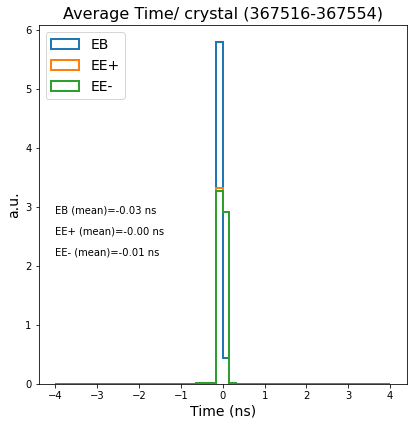

In [7]:
file='/eos/cms/store/group/dpg_ecal/alca_ecalcalib/EcalTiming/Run2023C/Calibration/367516_367554_tCut_10/ecalTiming-corr_validation.dat'
runs = file.split('/')[-2]
runs = runs.split('_')
srun = runs[0]
erun = runs[1]
plot_2d_map(file,srun,erun)
_,__,___ = plot_corrections(file,srun,erun)